In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd


In [2]:
df = pd.read_csv("diabetes_engineered_normalized_balanced_allNumerical.csv")

df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,gender_Female,...,Female_Child,Female_Adult,Female_Old,Other_Child,Other_Adult,Other_Old,age_squared,bmi_category,HbA1c_above_6_5,blood_glucose_above_126
0,1.389214,0,1,2,0.326336,0.155970,1.510204,1,2,0,...,0,0,0,0,0,0,5329.0,2,0,1
1,0.810480,0,0,0,-1.390648,2.485395,-0.298664,1,0,1,...,0,1,0,0,0,0,3600.0,3,1,1
2,1.611804,0,0,3,1.846798,1.180917,0.410216,1,2,1,...,0,0,1,0,0,0,6084.0,1,1,1
3,0.676926,0,0,3,0.098784,0.528678,0.043554,1,0,0,...,0,0,0,0,0,0,3249.0,2,0,1
4,1.077588,0,0,3,-0.012037,1.833156,0.532437,1,2,1,...,0,0,1,0,0,0,4356.0,2,1,1


In [3]:
diabetes_counts = df['diabetes'].value_counts()

# Calculate the percentage for each class
diabetes_percentage = (diabetes_counts / len(df)) * 100

# Display the result
print("Diabetes distribution (in percentage):")
print(diabetes_percentage)

Diabetes distribution (in percentage):
diabetes
0    87.001019
1    12.998981
Name: count, dtype: float64


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'diabetes_engineered_normalized_balanced_allNumerical' is your dataframe

# Define the features (X) and target (y)
X = df.drop(columns=['diabetes'])  # Features (excluding 'diabetes')
y = df['diabetes']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100,  # Number of trees in the forest
                                  random_state=42,
                                  class_weight='balanced',  # Helps to handle imbalanced data
                                  n_jobs=-1)  # Use all available cores for training

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = rf_model.predict(X_test)

# Evaluate the model
print("Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Test Set Evaluation:
Accuracy: 0.9826313052522101
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     16730
           1       0.95      0.91      0.93      2500

    accuracy                           0.98     19230
   macro avg       0.97      0.95      0.96     19230
weighted avg       0.98      0.98      0.98     19230

Confusion Matrix:
 [[16619   111]
 [  223  2277]]


In [6]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

accuracy, precision, recall, f1, roc_auc

(0.9826313052522101,
 0.9535175879396985,
 0.9108,
 0.9316693944353519,
 0.9884606216377765)

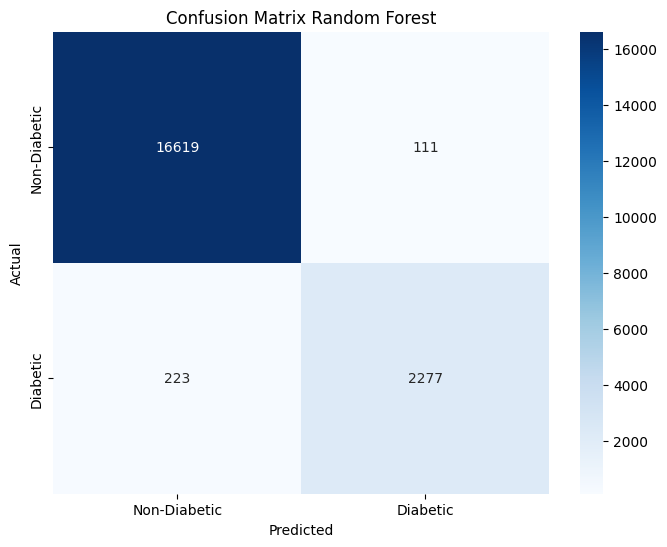

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your model is named 'model' and your test data is X_test, y_test
y_pred_test = rf_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [10]:
import pickle

# Save the model to a .pkl file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)